In [2]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\\lenovo\\Downloads\\CreditCard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data = dataset.values.tolist()
import numpy as np
df = np.asarray(data)
print(df)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811730e-02 ... -2.10530530e-02
   1.49620000e+02  0.00000000e+00]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.47241690e-02
   2.69000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.97518410e-02
   3.78660000e+02  0.00000000e+00]
 ...
 [ 4.17910000e+04 -7.22273131e+00  6.15577293e+00 ...  2.57468457e-01
   9.99900000e+01  1.00000000e+00]
 [ 4.18510000e+04 -1.91397329e+01  9.28684736e+00 ... -1.25652362e+00
   1.39900000e+02  1.00000000e+00]
 [ 4.18700000e+04 -2.09069081e+01  9.84315322e+00 ... -1.07123831e+00
   1.00000000e+00  1.00000000e+00]]


In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3)


In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

scaler.fit(df_train)
df_train =scaler.transform(df_train)
df_test =scaler.transform(df_test)

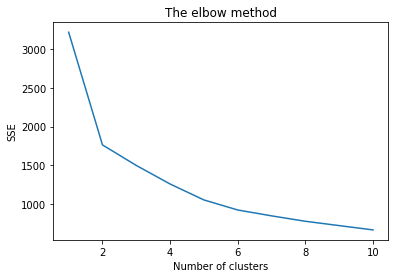

In [71]:
from sklearn.cluster import KMeans

SSE =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_train)
    kmeans.fit(df_test)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2)
y_fit = kmeans.fit(df_train)
y_kmeans = y_fit.predict(df_test)
print(y_kmeans)
train_centres= kmeans.cluster_centers_

[0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0]


In [61]:
#plt.scatter(df_test[:, 0], df_test[:, 1], c=y_kmeans, s=50, cmap='viridis')
#plt.show()


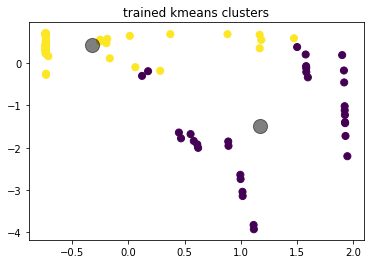

In [24]:
plt.scatter(df_test[:, 0], df_test[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(train_centres[:, 0], train_centres[:, 1], c='black', s=200, alpha=0.5);
plt.title('trained kmeans clusters')
plt.show()

In [59]:
from sklearn import metrics
import random
Class = dataset['Class']
cl = Class.values.tolist()
cl_array = np.asarray(cl)
print(cl_array)
sampling = random.choices(cl_array, k=91)

print("Accuracy:",round(metrics.accuracy_score(sampling, y_kmeans),2) * 100, "%")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Accuracy: 53.0 %


In [60]:
target_names = ['class 0', 'class 1']

print(metrics.confusion_matrix(sampling, y_kmeans))
print("Classification report\n", metrics.classification_report(sampling, y_kmeans,target_names =target_names))  


[[16 27]
 [16 32]]
Classification report
               precision    recall  f1-score   support

     class 0       0.50      0.37      0.43        43
     class 1       0.54      0.67      0.60        48

    accuracy                           0.53        91
   macro avg       0.52      0.52      0.51        91
weighted avg       0.52      0.53      0.52        91



In [62]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.3)


In [81]:
kmeans = KMeans(n_clusters=5)
y_fit = kmeans.fit(dataset_train)
y_kmean = y_fit.predict(dataset_test)
print(y_kmean)
train_centres= kmeans.cluster_centers_

[1 1 1 1 1 2 1 2 1 2 2 4 2 1 2 1 4 1 1 1 1 0 1 1 1 0 1 0 0 1 3 0 2 1 1 3 1
 1 1 4 1 1 1 1 2 4 0 2 3 2 1 1 4 1 1 2 1 1 1 2 1 2 4 1 2 2 2 4 1 4 4 1 2 1
 1 2 2 0 1 1 2 1 1 1 1 1 1 1 3 0 4]


In [82]:
#plt.scatter(dataset_train[:, 0], dataset_train[:, 1], c=y_kmean, s=50, cmap='viridis')
#plt.scatter(dataset[:,0], dataset[:,1])

